Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[100   0]
 [  3 102]]


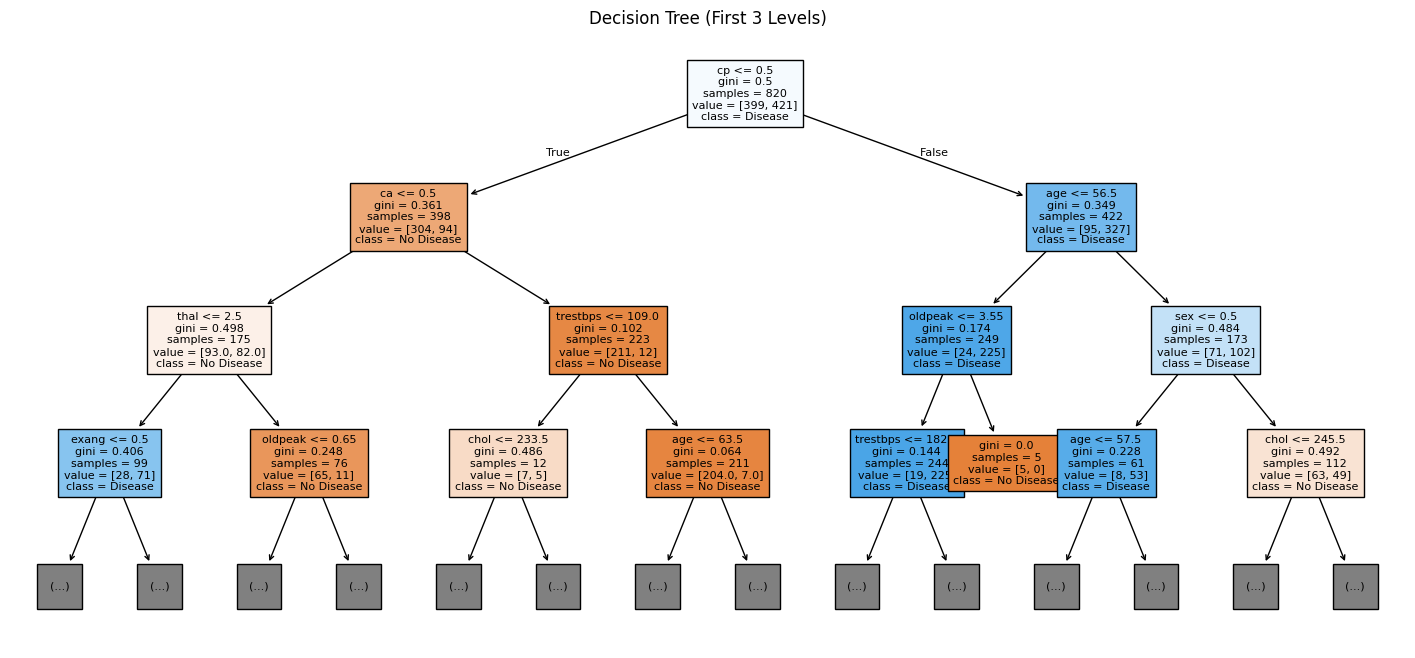

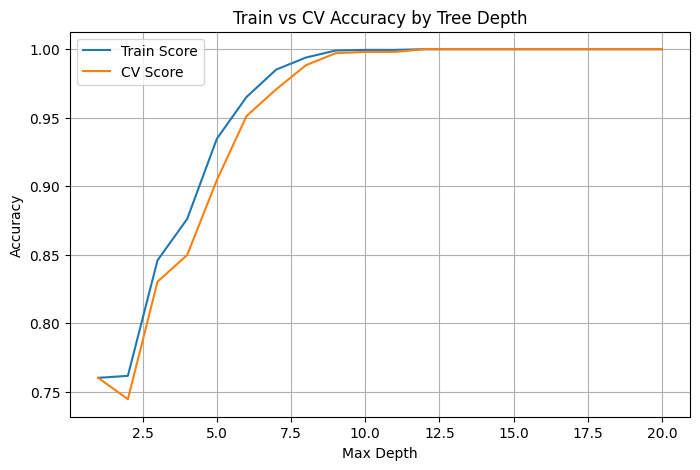

Tuned Decision Tree Accuracy: 0.8731707317073171
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



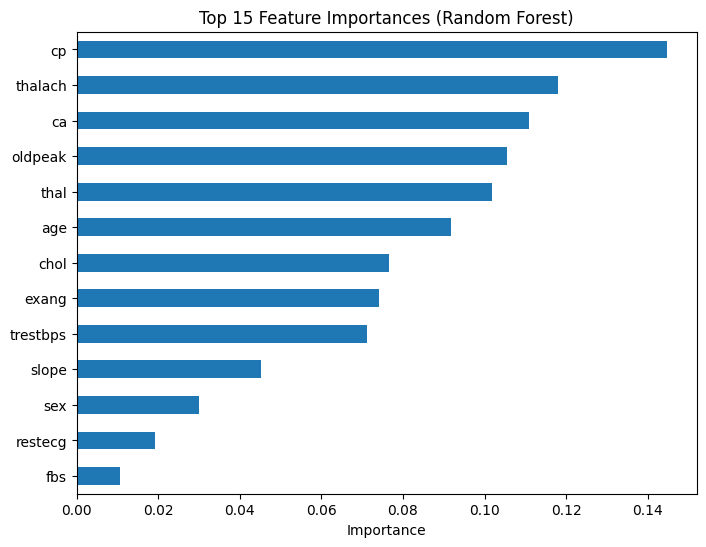

Decision Tree CV Mean Accuracy: 0.9043902439024392
Random Forest CV Mean Accuracy: 0.9960975609756098


['random_forest.pkl']

In [1]:
# Task 5 - Decision Trees & Random Forests (Heart Disease Dataset)
# Step 1: Train a Decision Tree Classifier and visualize the tree

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv("/content/heart.csv")
X = df.drop(columns=["target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Accuracy & report
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Visualize first 3 levels of tree
plt.figure(figsize=(18,8))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"],
          filled=True, max_depth=3, fontsize=8)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

# Step 2: Analyze overfitting and control tree depth

from sklearn.model_selection import cross_validate

depths = list(range(1, 21))
train_scores = []
cv_scores = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    res = cross_validate(clf, X, y, cv=cv, return_train_score=True, n_jobs=-1)
    train_scores.append(res['train_score'].mean())
    cv_scores.append(res['test_score'].mean())

plt.figure(figsize=(8,5))
plt.plot(depths, train_scores, label='Train Score')
plt.plot(depths, cv_scores, label='CV Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs CV Accuracy by Tree Depth')
plt.grid(True)
plt.show()

# Choose best depth ( here, depth=5)
best_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
best_dt.fit(X_train, y_train)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, best_dt.predict(X_test)))

# Step 3: Train a Random Forest and compare accuracy

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Step 4: Interpret feature importances

feat_imp_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feat_imp_rf.head(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

# Step 5: Evaluate using cross-validation

dt_scores = cross_val_score(best_dt, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
rf_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

print("Decision Tree CV Mean Accuracy:", dt_scores.mean())
print("Random Forest CV Mean Accuracy:", rf_scores.mean())

joblib.dump(best_dt, 'best_decision_tree.pkl')
joblib.dump(rf, 'random_forest.pkl')
